# Compare uncertainties from old framework and updated framework

Here is the script to assemble the unfolded results from `2DData_expunc.root` and `2DClosure_expunc.root` and make the final plots of the analysis. 

Note: You have to access the files through cernbox as they are too large for github. 

https://cernbox.cern.ch/cernbox/desktop/index.php/s/rsYvLcidoUFEKV0

https://cernbox.cern.ch/cernbox/desktop/index.php/s/DsRRXR9bEKOGzoU



In [1]:
import ROOT
from Unfolder import *

ROOT.gROOT.Macro("rootlogon.C")



Welcome to JupyROOT 6.10/04


0L

In [2]:
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")



In [3]:

normfile = ROOT.TFile('uncertainties_softdrop5.root')
absfile = ROOT.TFile('uncertainties_softdrop_absolute5.root')


In [6]:
sysvars = ['jec', 'jer', 'jmr', 'jms', 'pu', 'lum', 'pdf', 'ps', 'stat', 'tot']

In [7]:
c_norm = normfile.Get("cunc5softdrop")
c_abs = absfile.Get("cunc5softdrop_absolute")

for ival in c_norm.GetListOfPrimitives():
    print ival
for ival in c_abs.GetListOfPrimitives():
    print ival
    

<ROOT.TFrame object ("TFrame") at 0x7fcc4d64f080>
<ROOT.THStack object ("2d_response_softdrop_jernom__jec_uncstack5") at 0x7fcc4d6930c0>
<ROOT.TLegend object ("TPave") at 0x7fcc4d6d1e80>
<ROOT.TFrame object ("TFrame") at 0x7fcc4a406070>
<ROOT.THStack object ("2d_response_softdrop_jernom__jec_uncstack5") at 0x7fcc4a405800>
<ROOT.TLegend object ("TPave") at 0x7fcc4a40c500>


In [9]:

hists_norm = dict( zip( sysvars , c_norm.GetPrimitive("2d_response_softdrop_jernom__jec_uncstack5").GetHists()))
hists_abs = dict( zip( sysvars , c_abs.GetPrimitive("2d_response_softdrop_jernom__jec_uncstack5").GetHists()))




Info in <TCanvas::Print>: png file unc_compare_softdrop_5_abs_vs_normjec.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_abs_vs_normjec.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_abs_vs_normjer.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_abs_vs_normjer.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_abs_vs_normjmr.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_abs_vs_normjmr.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_abs_vs_normjms.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_abs_vs_normjms.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_abs_vs_normpu.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_abs_vs_normpu.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_abs_

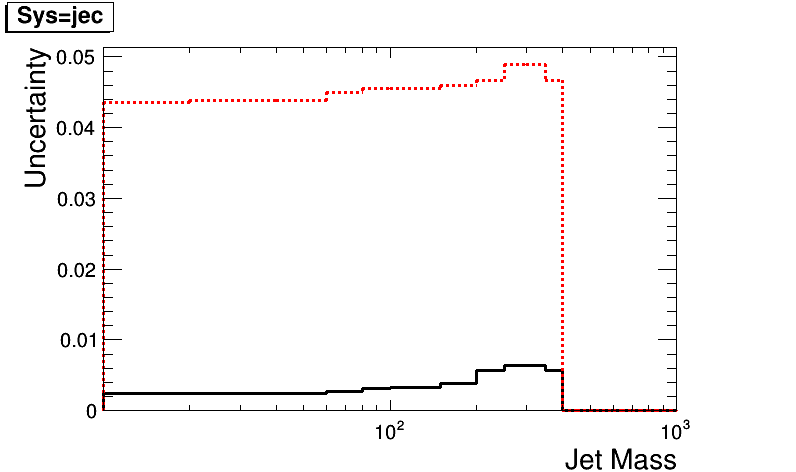

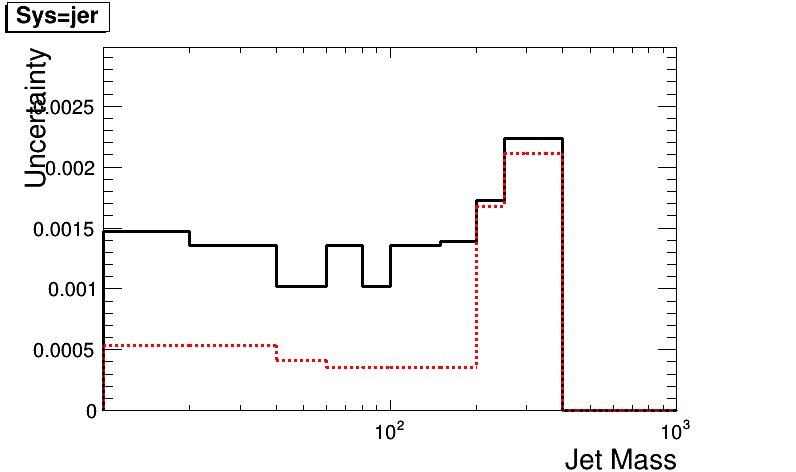

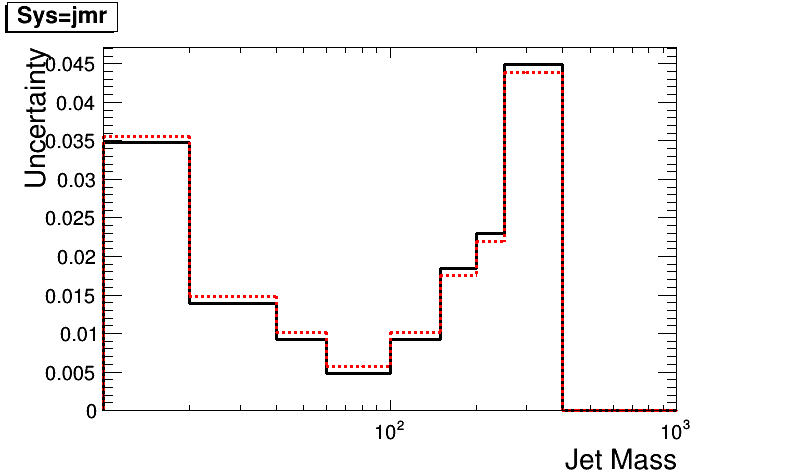

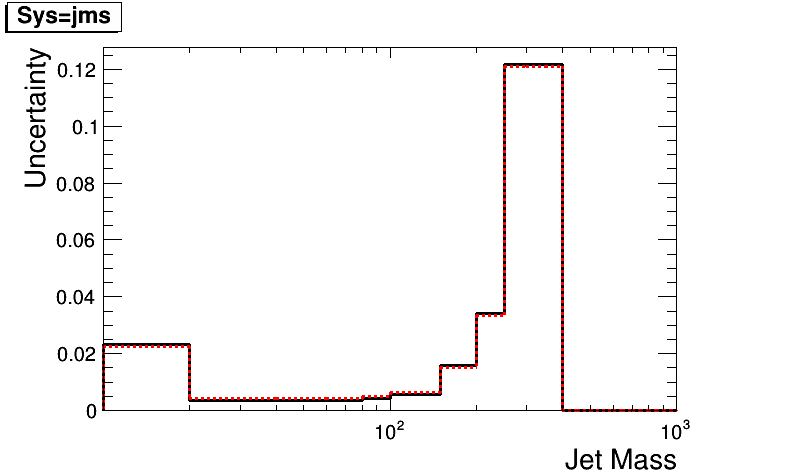

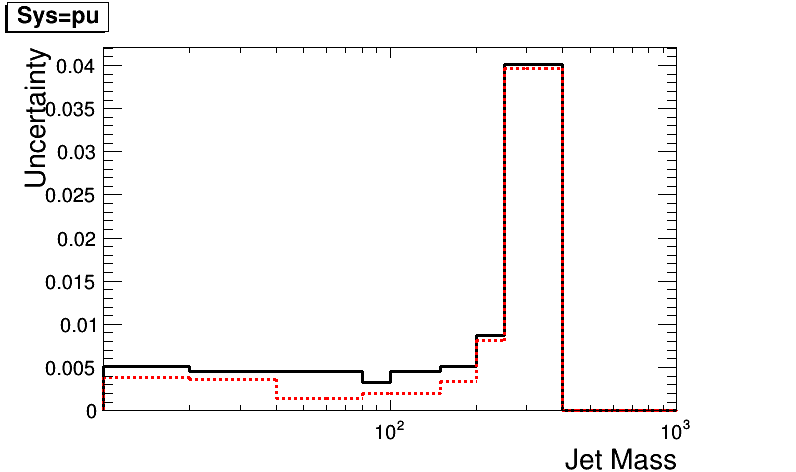

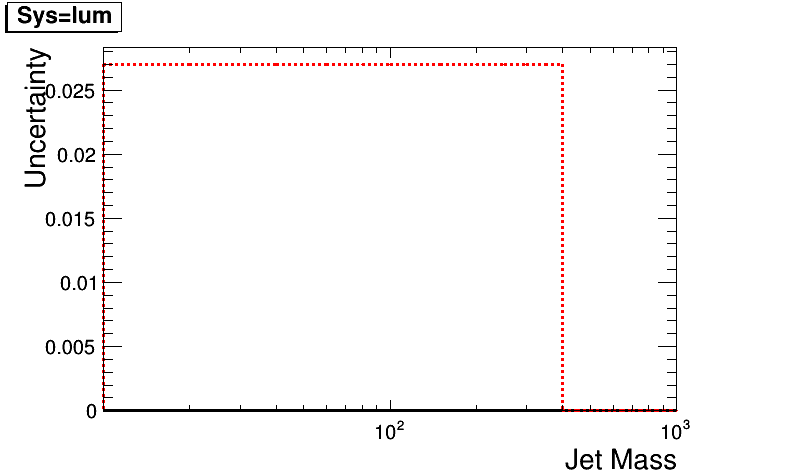

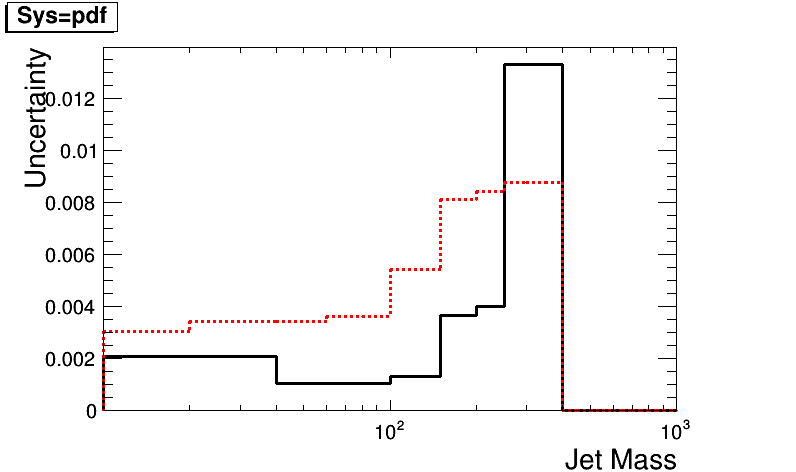

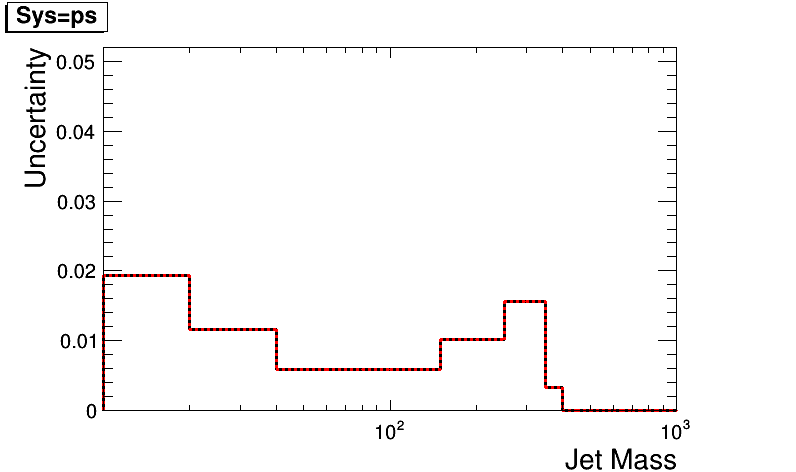

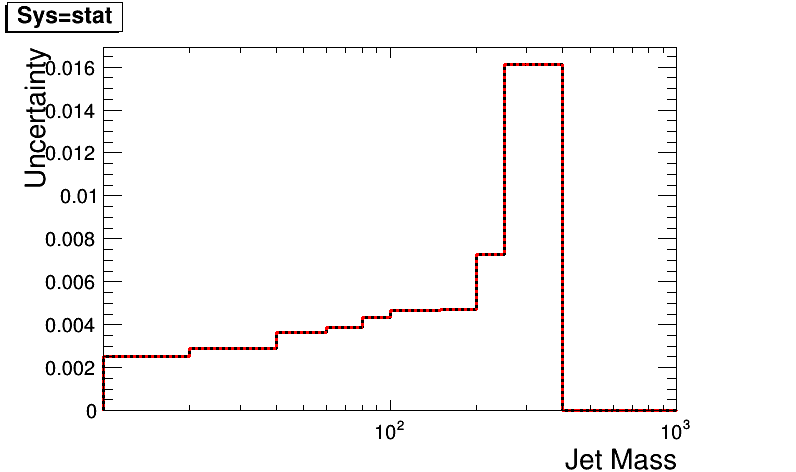

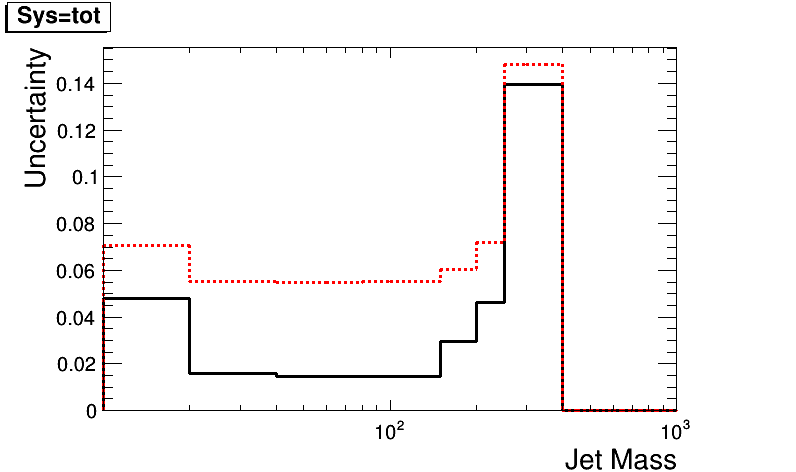

In [11]:
canvs = []
stacks = []


for isys in sysvars :
    c = ROOT.TCanvas("canv_" + isys, "canv_" + isys)
    s = ROOT.THStack("stack_" + isys, 'Sys=' + isys + ';Jet Mass;Uncertainty')
    hnorm = hists_norm[isys]
    habs = hists_abs[isys]
    hnorm.SetLineStyle(1)
    hnorm.SetLineColor(1)
    habs.SetLineStyle(2)
    habs.SetLineColor(2)
    s.Add(hnorm)
    s.Add(habs)
    s.Draw("nostack hist")
    s.GetXaxis().SetRangeUser(10.,1000.)
    c.SetLogx()
    #c.SetLogy()
    c.Draw()    
    canvs.append(c)
    stacks.append(s)
    c.Print("unc_compare_softdrop_5_abs_vs_norm" + isys + ".png", "png")
    c.Print("unc_compare_softdrop_5_abs_vs_norm" + isys + ".pdf", "pdf")